## Sales Analysis

In [13]:
import pandas as pd
import os

#### 1) Reading all files

In [14]:
from os import listdir

lista_csv = [file for file in listdir('vendas')]

for arquivo in lista_csv:
    print(arquivo)

Devolucoes - Belo Horizonte.csv
Devolucoes - Curitiba.csv
Devolucoes - Fortaleza.csv
Devolucoes - Goiás.csv
Devolucoes - Porto Alegre.csv
Devolucoes - Recife.csv
Devolucoes - Rio de Janeiro.csv
Devolucoes - Salvador.csv
Devolucoes - São Paulo.csv
Vendas - Belo Horizonte.csv
Vendas - Curitiba.csv
Vendas - Fortaleza.csv
Vendas - Goiás.csv
Vendas - Porto Alegre.csv
Vendas - Recife.csv
Vendas - Rio de Janeiro.csv
Vendas - Salvador.csv
Vendas - São Paulo.csv


### 2) Merging all cities data into a single .csv

In [15]:
uni_tabela_vendas = pd.DataFrame()

for arquivo in lista_csv:
    if "Vendas" in arquivo:
        tabela = pd.read_csv(f'vendas/{arquivo}')
        uni_tabela_vendas = pd.concat([uni_tabela_vendas, tabela])

In [16]:
uni_tabela_vendas.sample(5)

,Unnamed: 0,SKU,Produto,Quantidade Vendida,Primeiro Nome,Sobrenome,Data,Loja,Preco Unitario,Unnamed: 8
691,9594,HL4379,Televisão,4,Monique,Vasconcelos,10/8/2018,Curitiba,2500,NaN
678,9332,HL1918,iPhone,4,Ives,Teixeira,3/7/2018,Curitiba,5300,NaN
535,3867,HL2714,Tablet,5,Victor,Lira,7/23/2018,Fortaleza,1600,NaN
2134,9592,HL9962,Android,1,Guilherme,Monteiro,1/2/2018,São Paulo,3400,NaN
1986,8908,HL2714,Tablet,2,Cassio,Faria,2/25/2018,São Paulo,1600,NaN


### 3) Checking and removing NaN column

In [18]:
uni_tabela_vendas.isna().sum()

Unnamed: 0               0
SKU                      0
Produto                  0
Quantidade Vendida       0
Primeiro Nome            0
Sobrenome                0
Data                     0
Loja                     0
Preco Unitario           0
Unnamed: 8            9999
dtype: int64

In [19]:
uni_tabela_vendas.drop('Unnamed: 8', inplace=True, axis=1)

In [20]:
uni_tabela_vendas.sample(5)

,Unnamed: 0,SKU,Produto,Quantidade Vendida,Primeiro Nome,Sobrenome,Data,Loja,Preco Unitario
705,4638,HL2714,Tablet,5,Ana,Felippe,6/17/2018,Rio de Janeiro,1600
1293,9760,HL2714,Tablet,2,Luis,Souza,1/16/2018,Salvador,1600
1163,8132,HL1918,iPhone,4,Matheus,Delgado,2/25/2018,Fortaleza,5300
1691,7583,HL7348,SmartWatch,1,Ana,Campos,12/17/2018,São Paulo,1400
402,5239,HL2714,Tablet,3,Eduardo,Quindeler,11/9/2018,Goiás,1600


### 4) Best Sellers (Quantity)

In [21]:
mais_vendidos = uni_tabela_vendas.groupby(['Produto'], as_index= False).sum(['Quantidade Vendida']).sort_values(by= 'Quantidade Vendida', ascending= False)

mais_vendidos[['Produto', 'Quantidade Vendida']]

,Produto,Quantidade Vendida
6,iPhone,8974
5,Televisão,5931
2,Notebook,3249
0,Android,3183
3,SmartWatch,2980
4,Tablet,2921
1,Câmera,2805


### 5) Best Selling Products

#### 5.1) Adding a Billing (Faturamento) column

In [22]:
uni_tabela_vendas['Faturamento'] = uni_tabela_vendas['Quantidade Vendida'] * uni_tabela_vendas['Preco Unitario']

uni_tabela_vendas.head()

,Unnamed: 0,SKU,Produto,Quantidade Vendida,Primeiro Nome,Sobrenome,Data,Loja,Preco Unitario,Faturamento
0,17,HL4379,Televisão,2,Carolina,Alfradique,2/25/2018,Belo Horizonte,2500,5000
1,25,HL4379,Televisão,1,Danilo,Rubim,2/20/2018,Belo Horizonte,2500,2500
2,27,HL1918,iPhone,5,Bernard,Pedrosa,7/7/2018,Belo Horizonte,5300,26500
3,54,HL1918,iPhone,5,Lucas,Lemos,12/26/2018,Belo Horizonte,5300,26500
4,67,HL8851,Notebook,5,Bernardo,Botelho,6/8/2018,Belo Horizonte,3500,17500


In [25]:
faturamento = uni_tabela_vendas[['Produto', 'Faturamento']]

faturamento = faturamento.groupby(['Produto'], as_index= False).sum(['Faturamento']).sort_values(by= 'Faturamento', ascending= False)

faturamento[['Produto', 'Faturamento']]

,Produto,Faturamento
6,iPhone,47562200
5,Televisão,14827500
2,Notebook,11371500
0,Android,10822200
1,Câmera,5890500
4,Tablet,4673600
3,SmartWatch,4172000


### 6) Best Selling City

In [26]:
mv_cidade = uni_tabela_vendas.groupby(['Loja'], as_index= False).sum(['Faturamento']).sort_values(by= 'Faturamento', ascending= False)

mv_cidade[['Loja', 'Faturamento']]

,Loja,Faturamento
8,São Paulo,22098300
6,Rio de Janeiro,14867800
2,Fortaleza,14087900
7,Salvador,13111300
3,Goiás,7441800
5,Recife,7303000
1,Curitiba,7060500
4,Porto Alegre,6868600
0,Belo Horizonte,6480300


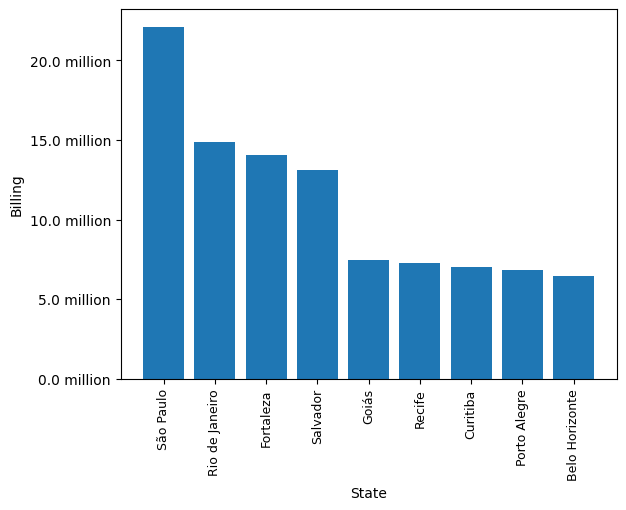

In [40]:
import matplotlib.pyplot as plt

def formatter(x, pos):
    return str(round(x / 1e6, 1)) + " million"

fig, ax = plt.subplots()
ax.yaxis.set_major_formatter(formatter)

cidades = [city for city, df in mv_cidade.groupby('Loja')]

plt.bar(mv_cidade['Loja'], mv_cidade['Faturamento'])
plt.ylabel('Billing')
plt.xlabel('State')
plt.xticks(cidades, rotation= 'vertical', size= 9)

plt.show()